In [320]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [321]:
df_train = pd.read_excel('../datasets/Data_Train.xlsx')
df_test = pd.read_excel('../datasets/Test_set.xlsx')

In [322]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [323]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [324]:
df_original = df_train.merge(df_test, how='outer')
df = df_original.copy()

In [325]:
df.shape

(13151, 11)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13151 entries, 0 to 13150
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13151 non-null  object 
 1   Date_of_Journey  13151 non-null  object 
 2   Source           13151 non-null  object 
 3   Destination      13151 non-null  object 
 4   Route            13150 non-null  object 
 5   Dep_Time         13151 non-null  object 
 6   Arrival_Time     13151 non-null  object 
 7   Duration         13151 non-null  object 
 8   Total_Stops      13150 non-null  object 
 9   Additional_Info  13151 non-null  object 
 10  Price            10697 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [327]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], axis=1,inplace=True)

In [328]:
df.isnull().sum()

Airline           0
Source            0
Destination       0
Route             1
Duration          0
Total_Stops       1
Price          2454
dtype: int64

In [329]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [330]:
from sklearn.preprocessing import LabelEncoder

In [331]:
lb = LabelEncoder()

In [332]:
airline=lb.fit_transform(df['Airline'])
df['Airline'] = airline
df['Airline'] = df['Airline'] + 1

In [333]:
df['Source'] = lb.fit_transform(df['Source'])
df['Source'] = df['Source'] + 1

In [334]:
df["Destination"] = lb.fit_transform(df["Destination"])
df["Destination"] += 1

In [335]:
times = df['Duration'].values
time_in_min = []

In [336]:
for time in times:
    if 'h' in time and 'm' in time:
        time_in_min.append(int(time.split()[0][:-1])*60  + int(time.split()[1][:-1]))
    elif 'h' in time:
        time_in_min.append(int(time[:-1])*60)
    else:
        time_in_min.append(int(time[:-1]))

In [337]:
time_in_min = np.array(time_in_min)
df['Duration'] = time_in_min

In [338]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,4,1,6,BLR → DEL,170,non-stop,3897.0
1,2,4,1,CCU → IXR → BBI → BLR,445,2 stops,7662.0
2,5,3,2,DEL → LKO → BOM → COK,1140,2 stops,13882.0
3,4,4,1,CCU → NAG → BLR,325,1 stop,6218.0
4,4,1,6,BLR → NAG → DEL,285,1 stop,13302.0


In [339]:
df["Total_Stops"].fillna(df["Total_Stops"].mode(), inplace=True)
df["Total_Stops"] = lb.fit_transform(df["Total_Stops"])
df["Total_Stops"] = df["Total_Stops"] + 1

In [340]:
df['Route'].fillna(df['Route'].mode(), inplace=True)
df['Route'] = lb.fit_transform(df["Total_Stops"])
df['Route'] = df['Route'] + 1

In [341]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,4,1,6,5,170,5,3897.0
1,2,4,1,2,445,2,7662.0
2,5,3,2,2,1140,2,13882.0
3,4,4,1,1,325,1,6218.0
4,4,1,6,1,285,1,13302.0


C:\Users\snirt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


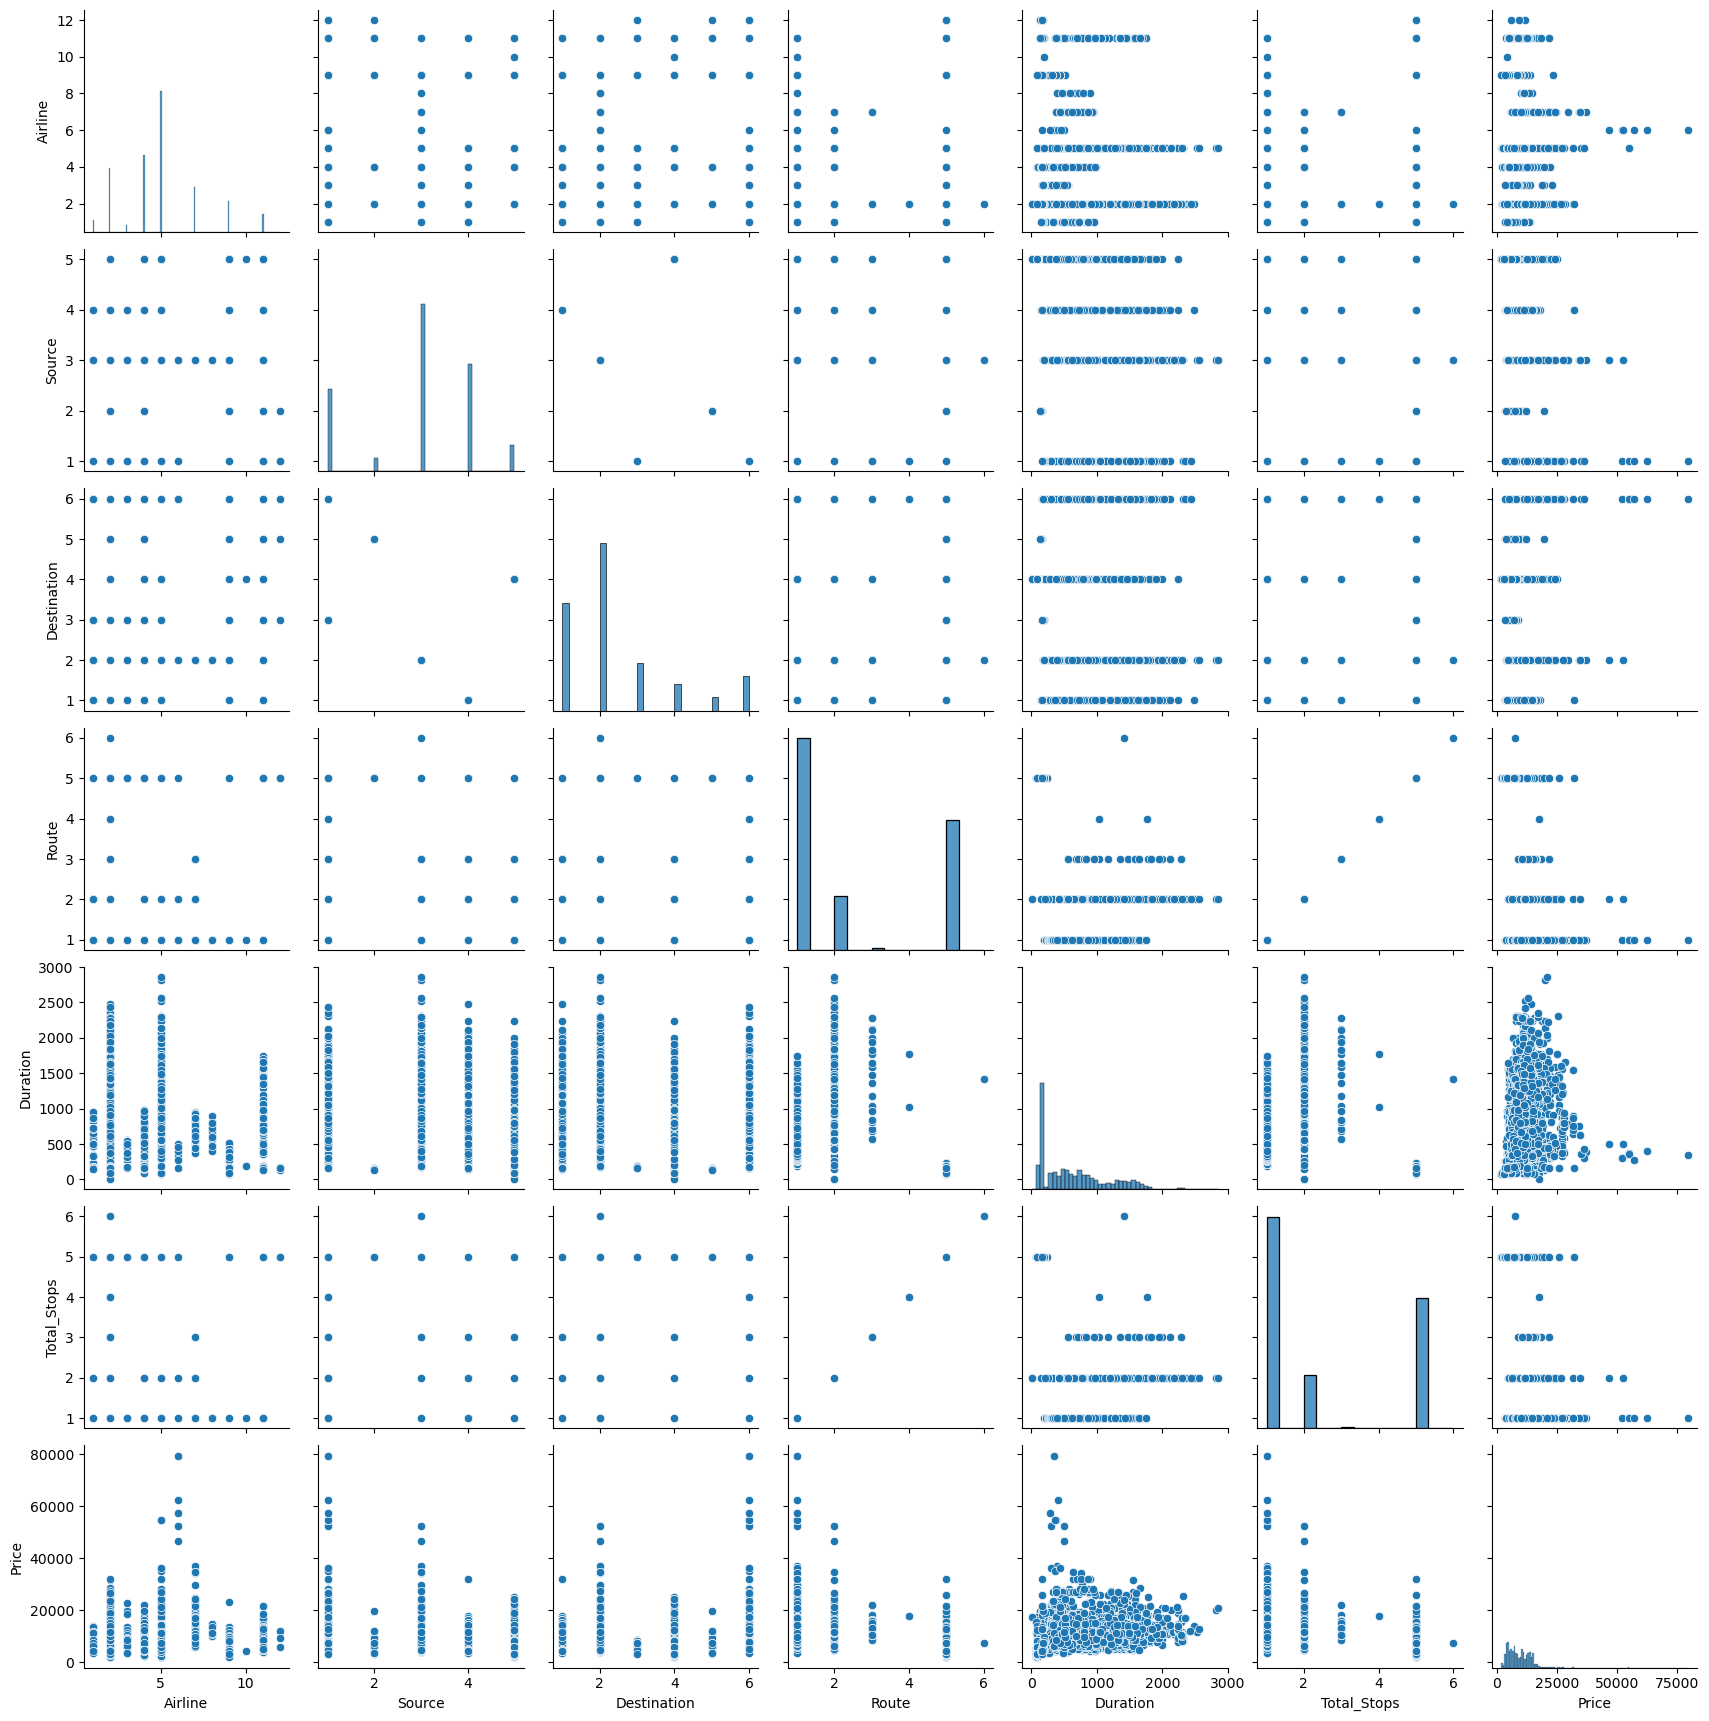

In [342]:
sns.pairplot(df)

In [343]:
corr = df.corr(numeric_only=True)

In [344]:
corr

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
Airline,1.000000,-0.018197,0.022512,0.040634,-0.159706,0.040634,-0.039537
Source,-0.018197,1.000000,-0.585372,-0.218584,0.156592,-0.218584,0.016282
Destination,0.022512,-0.585372,1.000000,0.330563,-0.250394,0.330563,-0.071593
Route,0.040634,-0.218584,0.330563,1.000000,-0.603309,1.000000,-0.571198
Duration,-0.159706,0.156592,-0.250394,-0.603309,1.000000,-0.603309,0.506540
Total_Stops,0.040634,-0.218584,0.330563,1.000000,-0.603309,1.000000,-0.571198
Price,-0.039537,0.016282,-0.071593,-0.571198,0.506540,-0.571198,1.000000


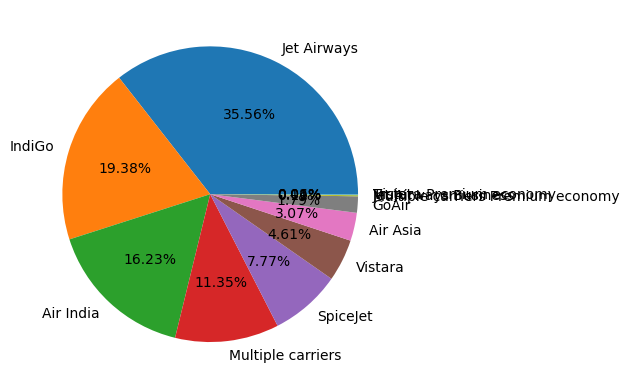

In [345]:
values = df_original['Airline'].value_counts().values
labels = label = df_original['Airline'].value_counts().index
plt.pie(x=values,labels=labels ,autopct='%1.2f%%')
plt.show()

C:\Users\snirt\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Price', ylabel='Airline'>

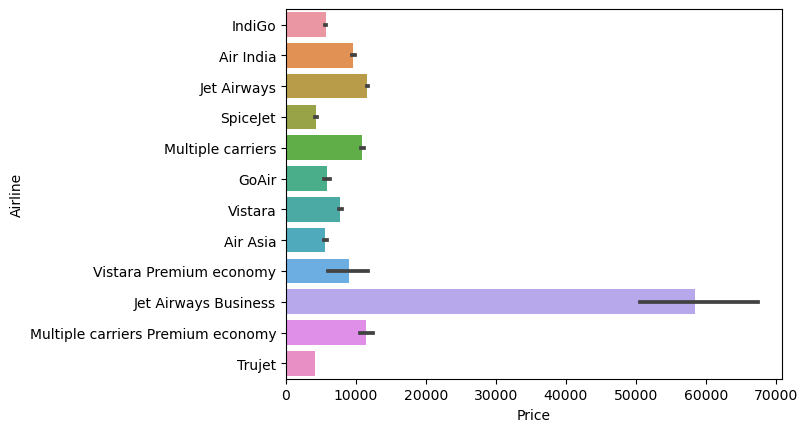

In [346]:
sns.barplot(y=df_original['Airline'], x=df_original['Price'])

C:\Users\snirt\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Total_Stops', ylabel='Price'>

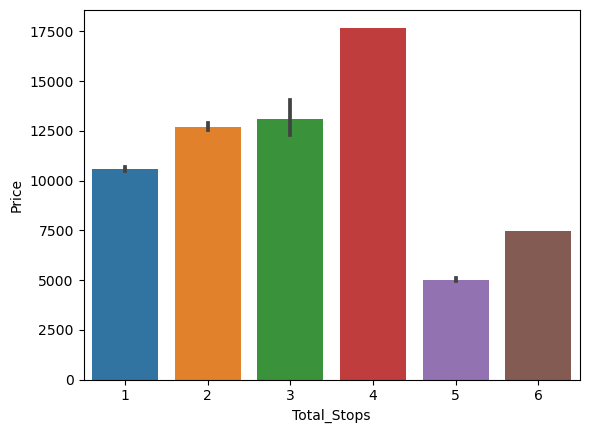

In [347]:
sns.barplot(y=df['Price'], x=df['Total_Stops'])

In [353]:
df_train = df[~df['Price'].isnull()]
df_test = df[df['Price'].isnull()]

In [357]:
X = df_train.drop(['Price'], axis=1)
y = df_train['Price']

In [355]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.33)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [427]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import tensorflow as tf

In [365]:
model1 = LinearRegression()
model1.fit(X_train ,y_train)

LinearRegression()

In [366]:
y_pred1 = model1.predict(X_test)

In [367]:
model1_r2 = r2_score(y_pred1, y_test)

In [368]:
model1_r2

-0.6414572122439359

In [440]:
def bar_ploting(y_test,y_pred,n, r2):
    ind = np.arange(n)
    width = 0.3
    plt.figure(figsize=(40,20))
    plt.bar(ind, y_pred[:n], width,label="predicter values")
    plt.bar(ind+width, y_test[:n],width, label="actual values")
    plt.title(r2)
    plt.legend()
    plt.show()
    
def polynomial(degree, X_train=X_train, y_train=y_train):
    poly = PolynomialFeatures(degree=degree,include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model2 = LinearRegression()
    model2.fit(X_train_poly, y_train)
    y_pred2 = model2.predict(X_test_poly)
    model2_r2 = r2_score(y_pred2, y_test)
    bar_ploting(y_test, y_pred2, 10, model2_r2)

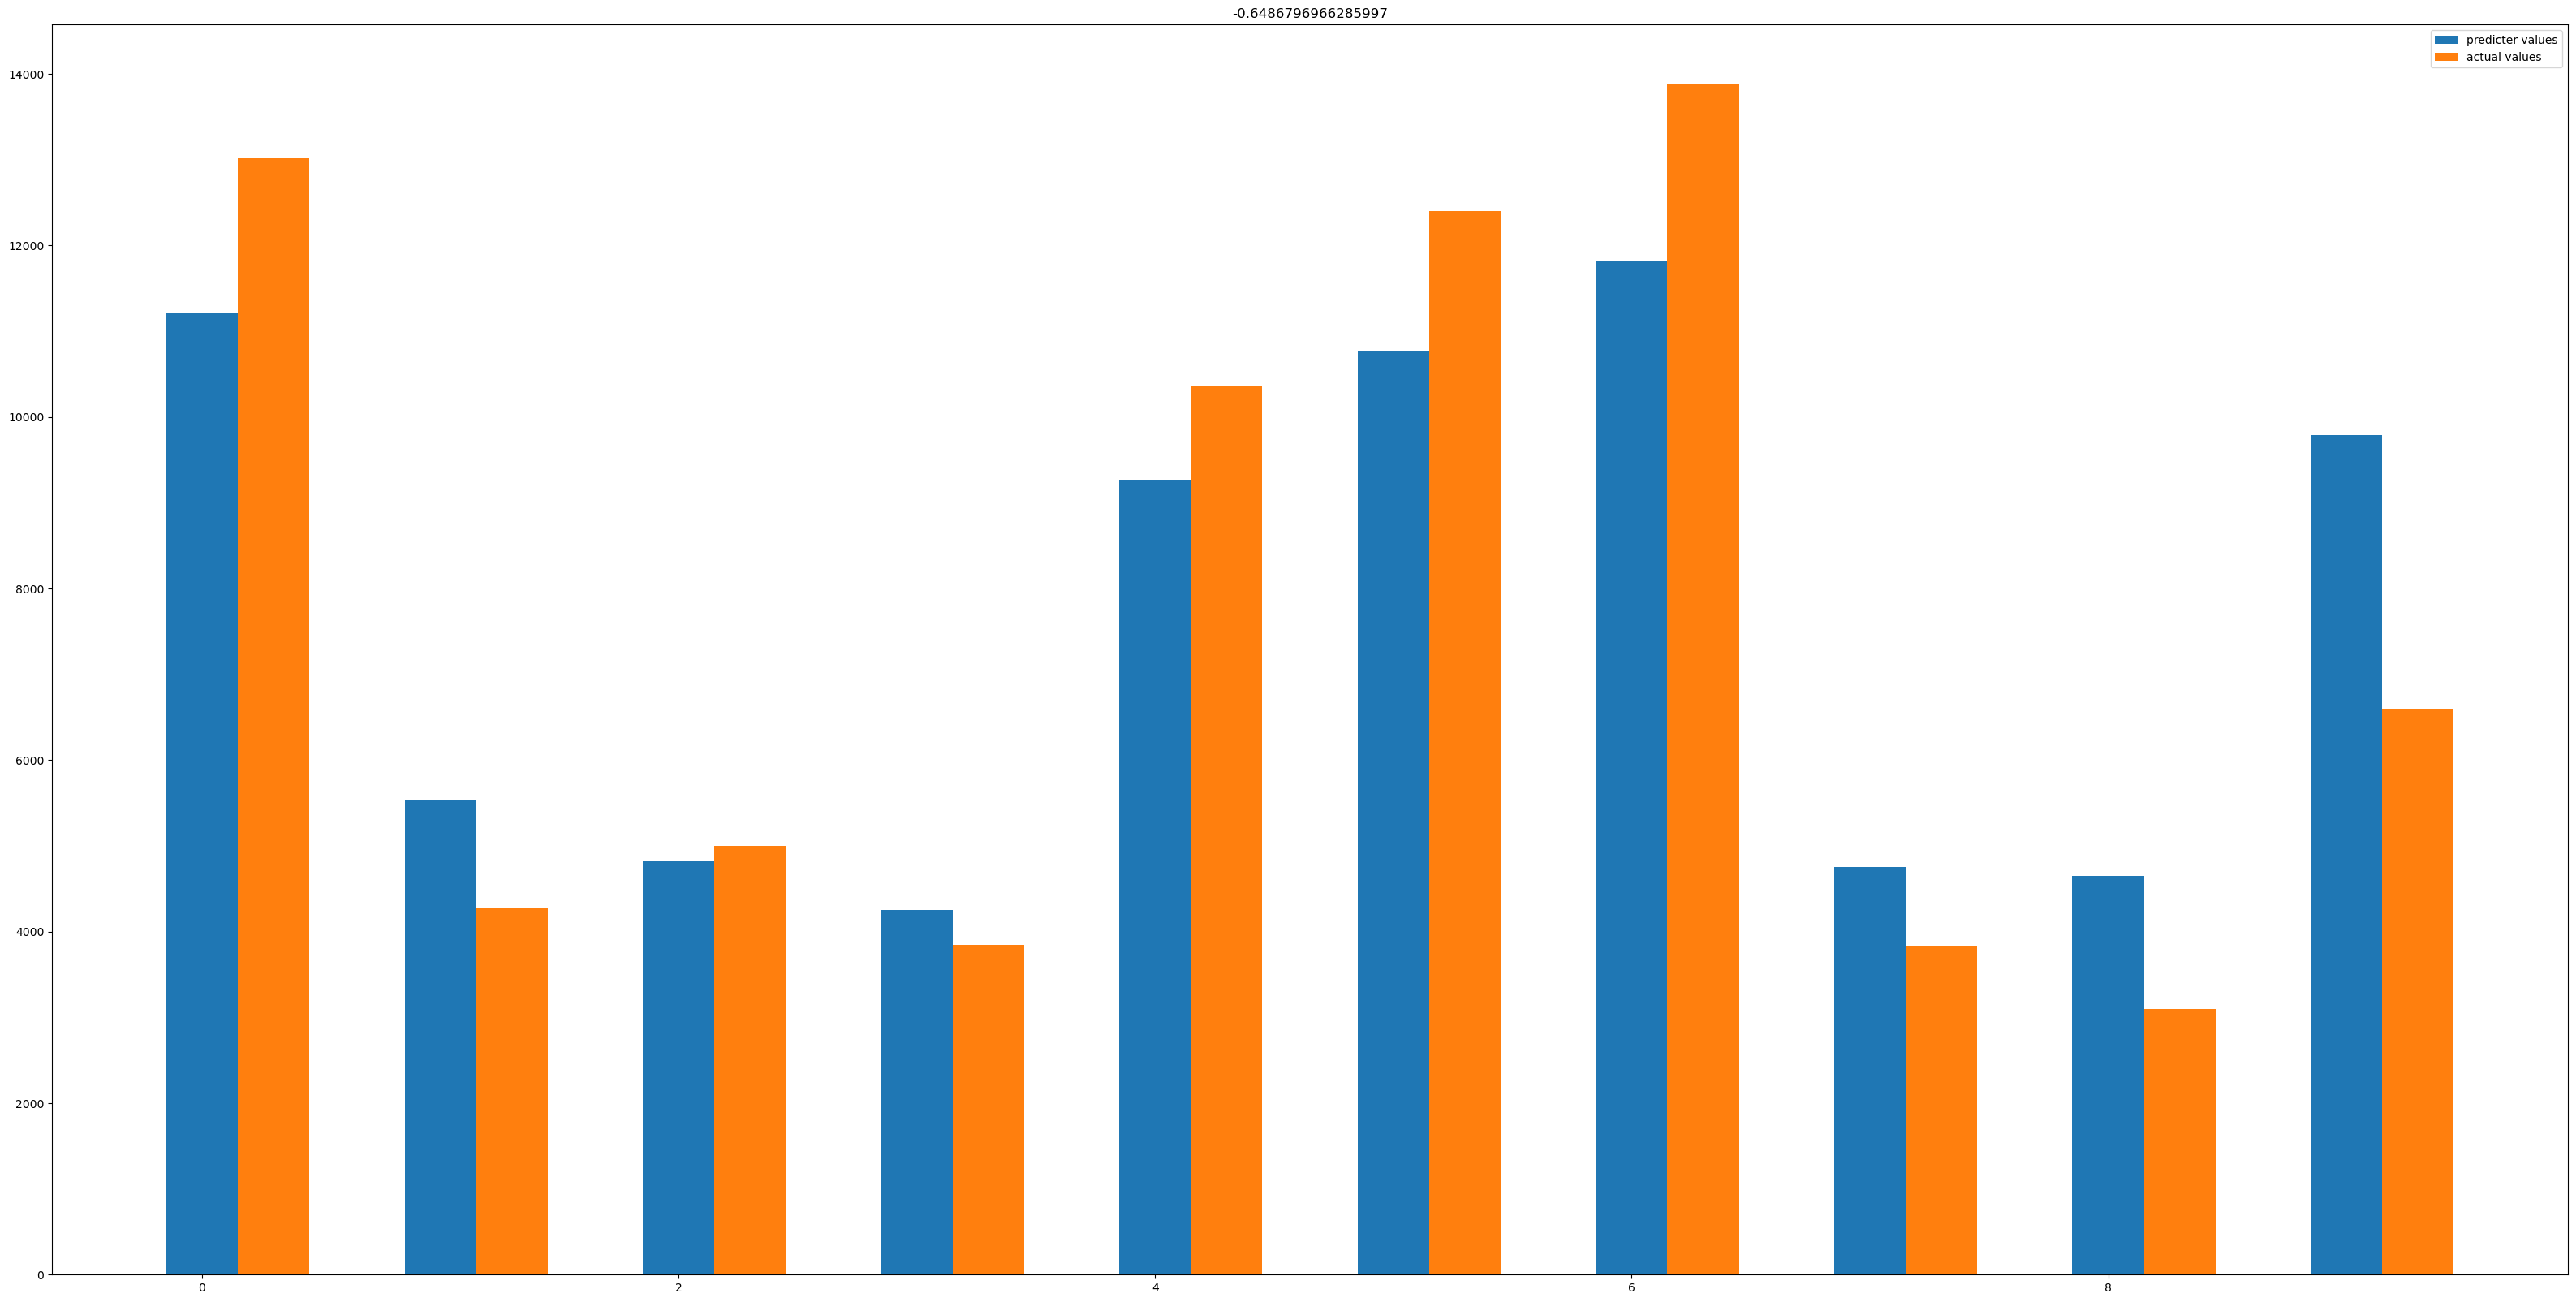

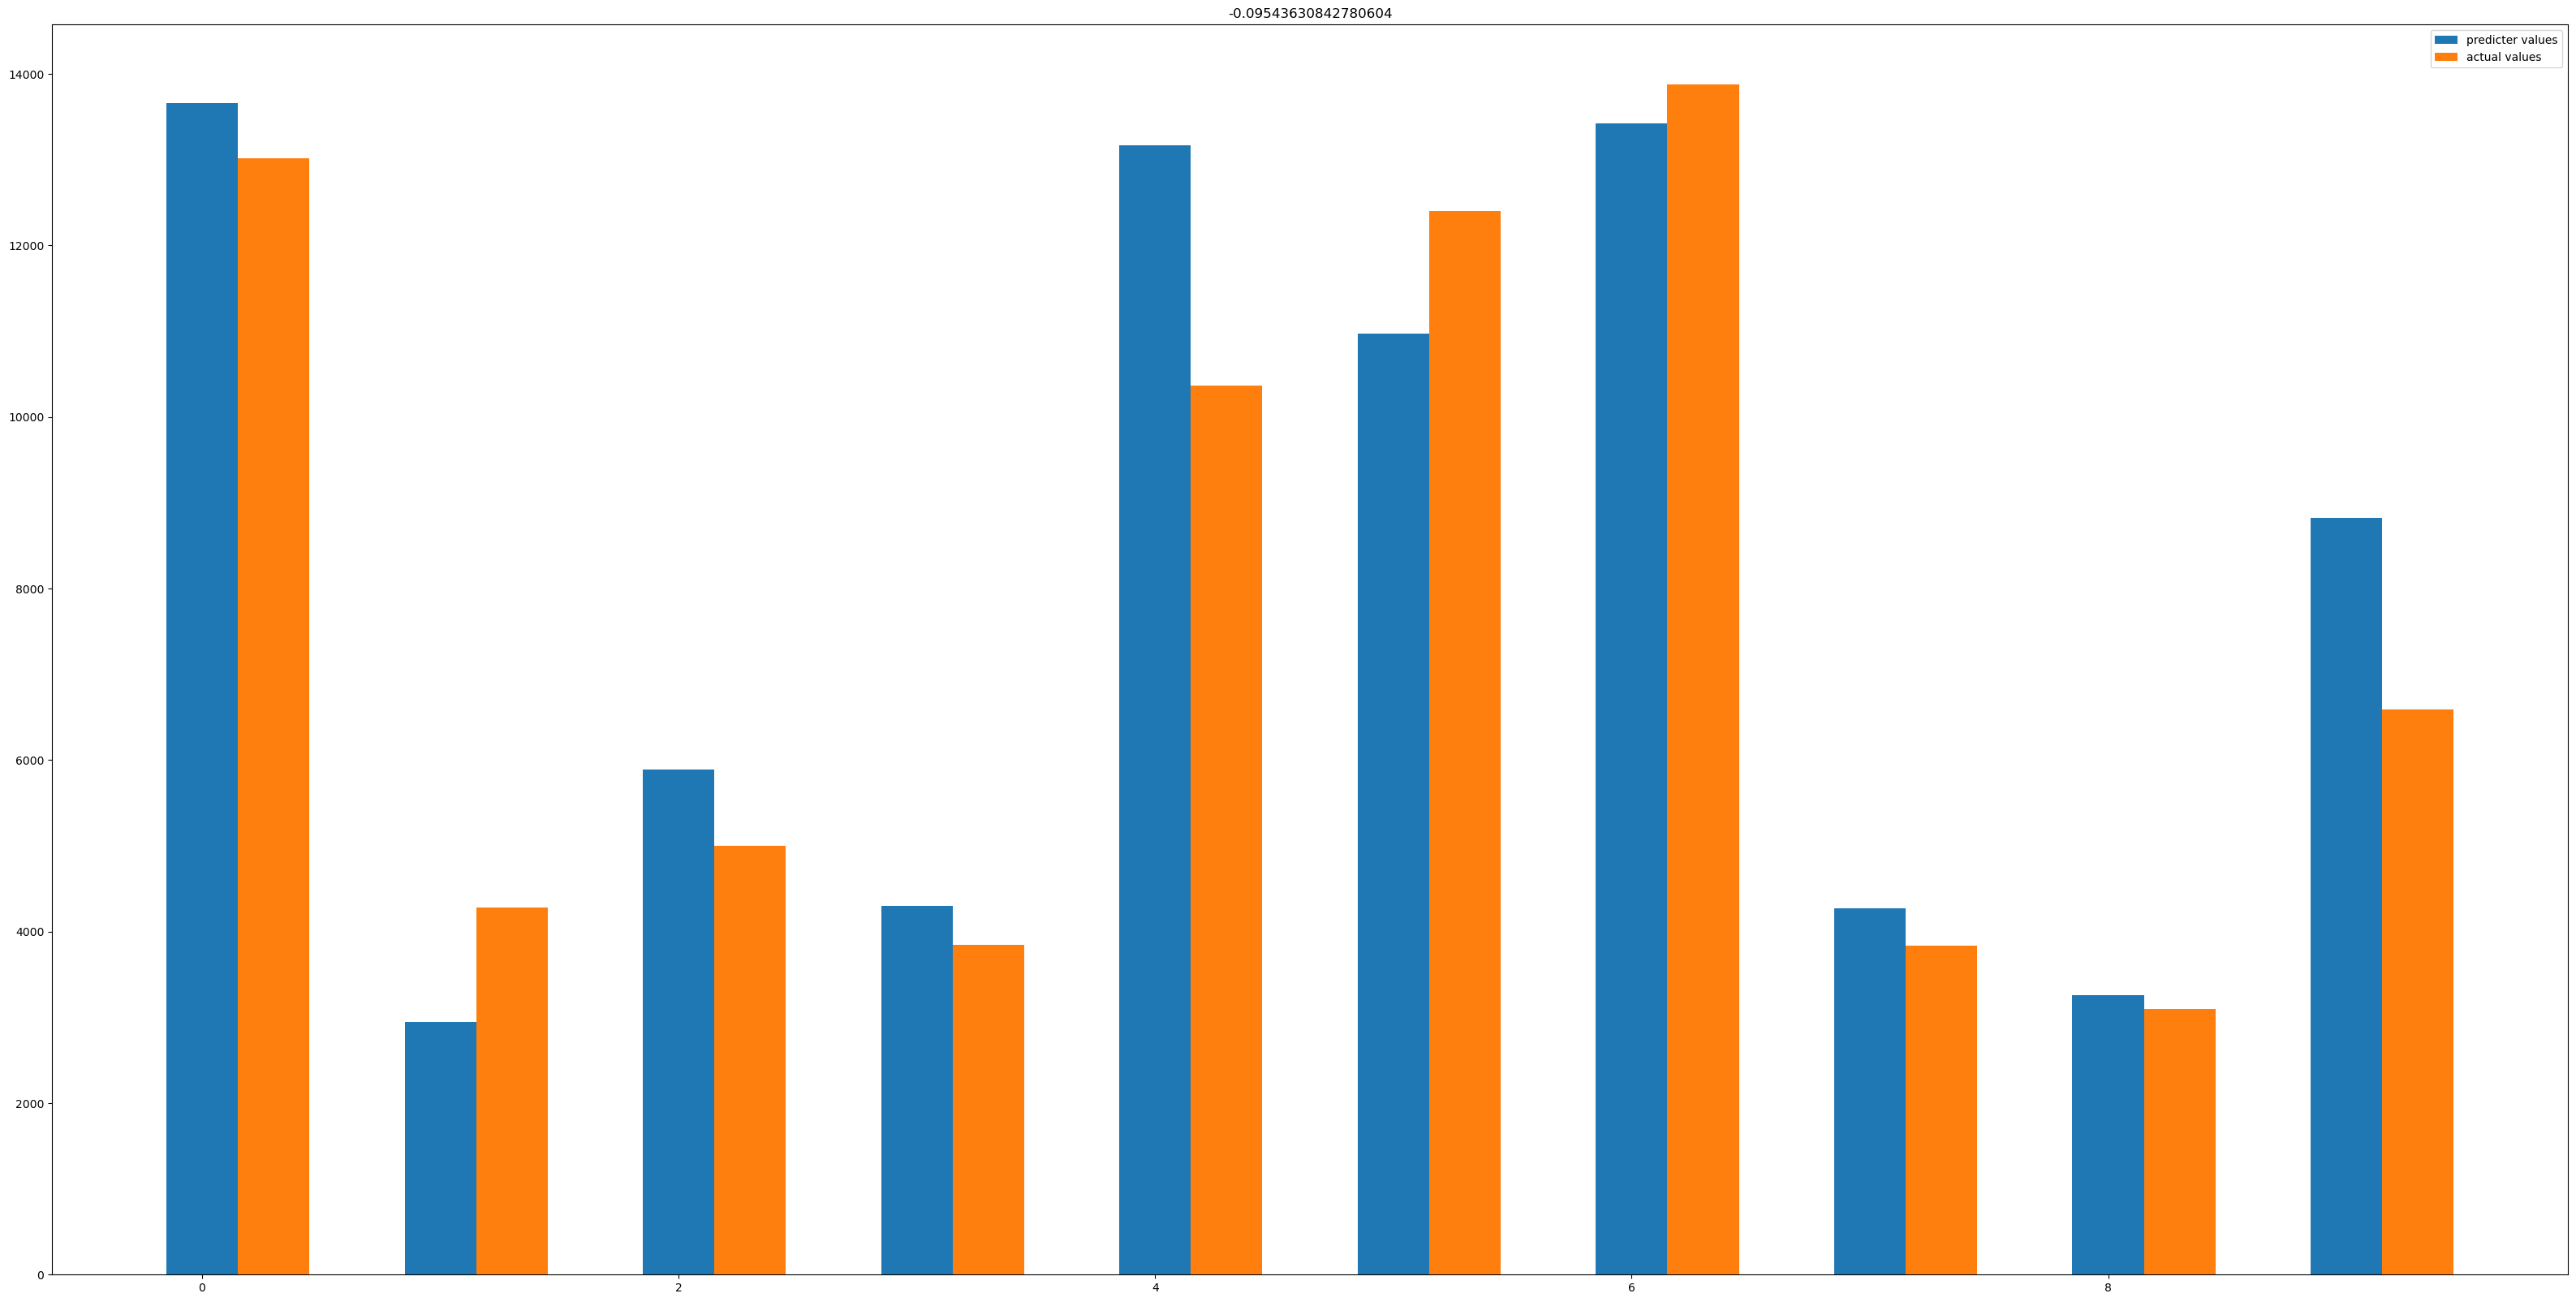

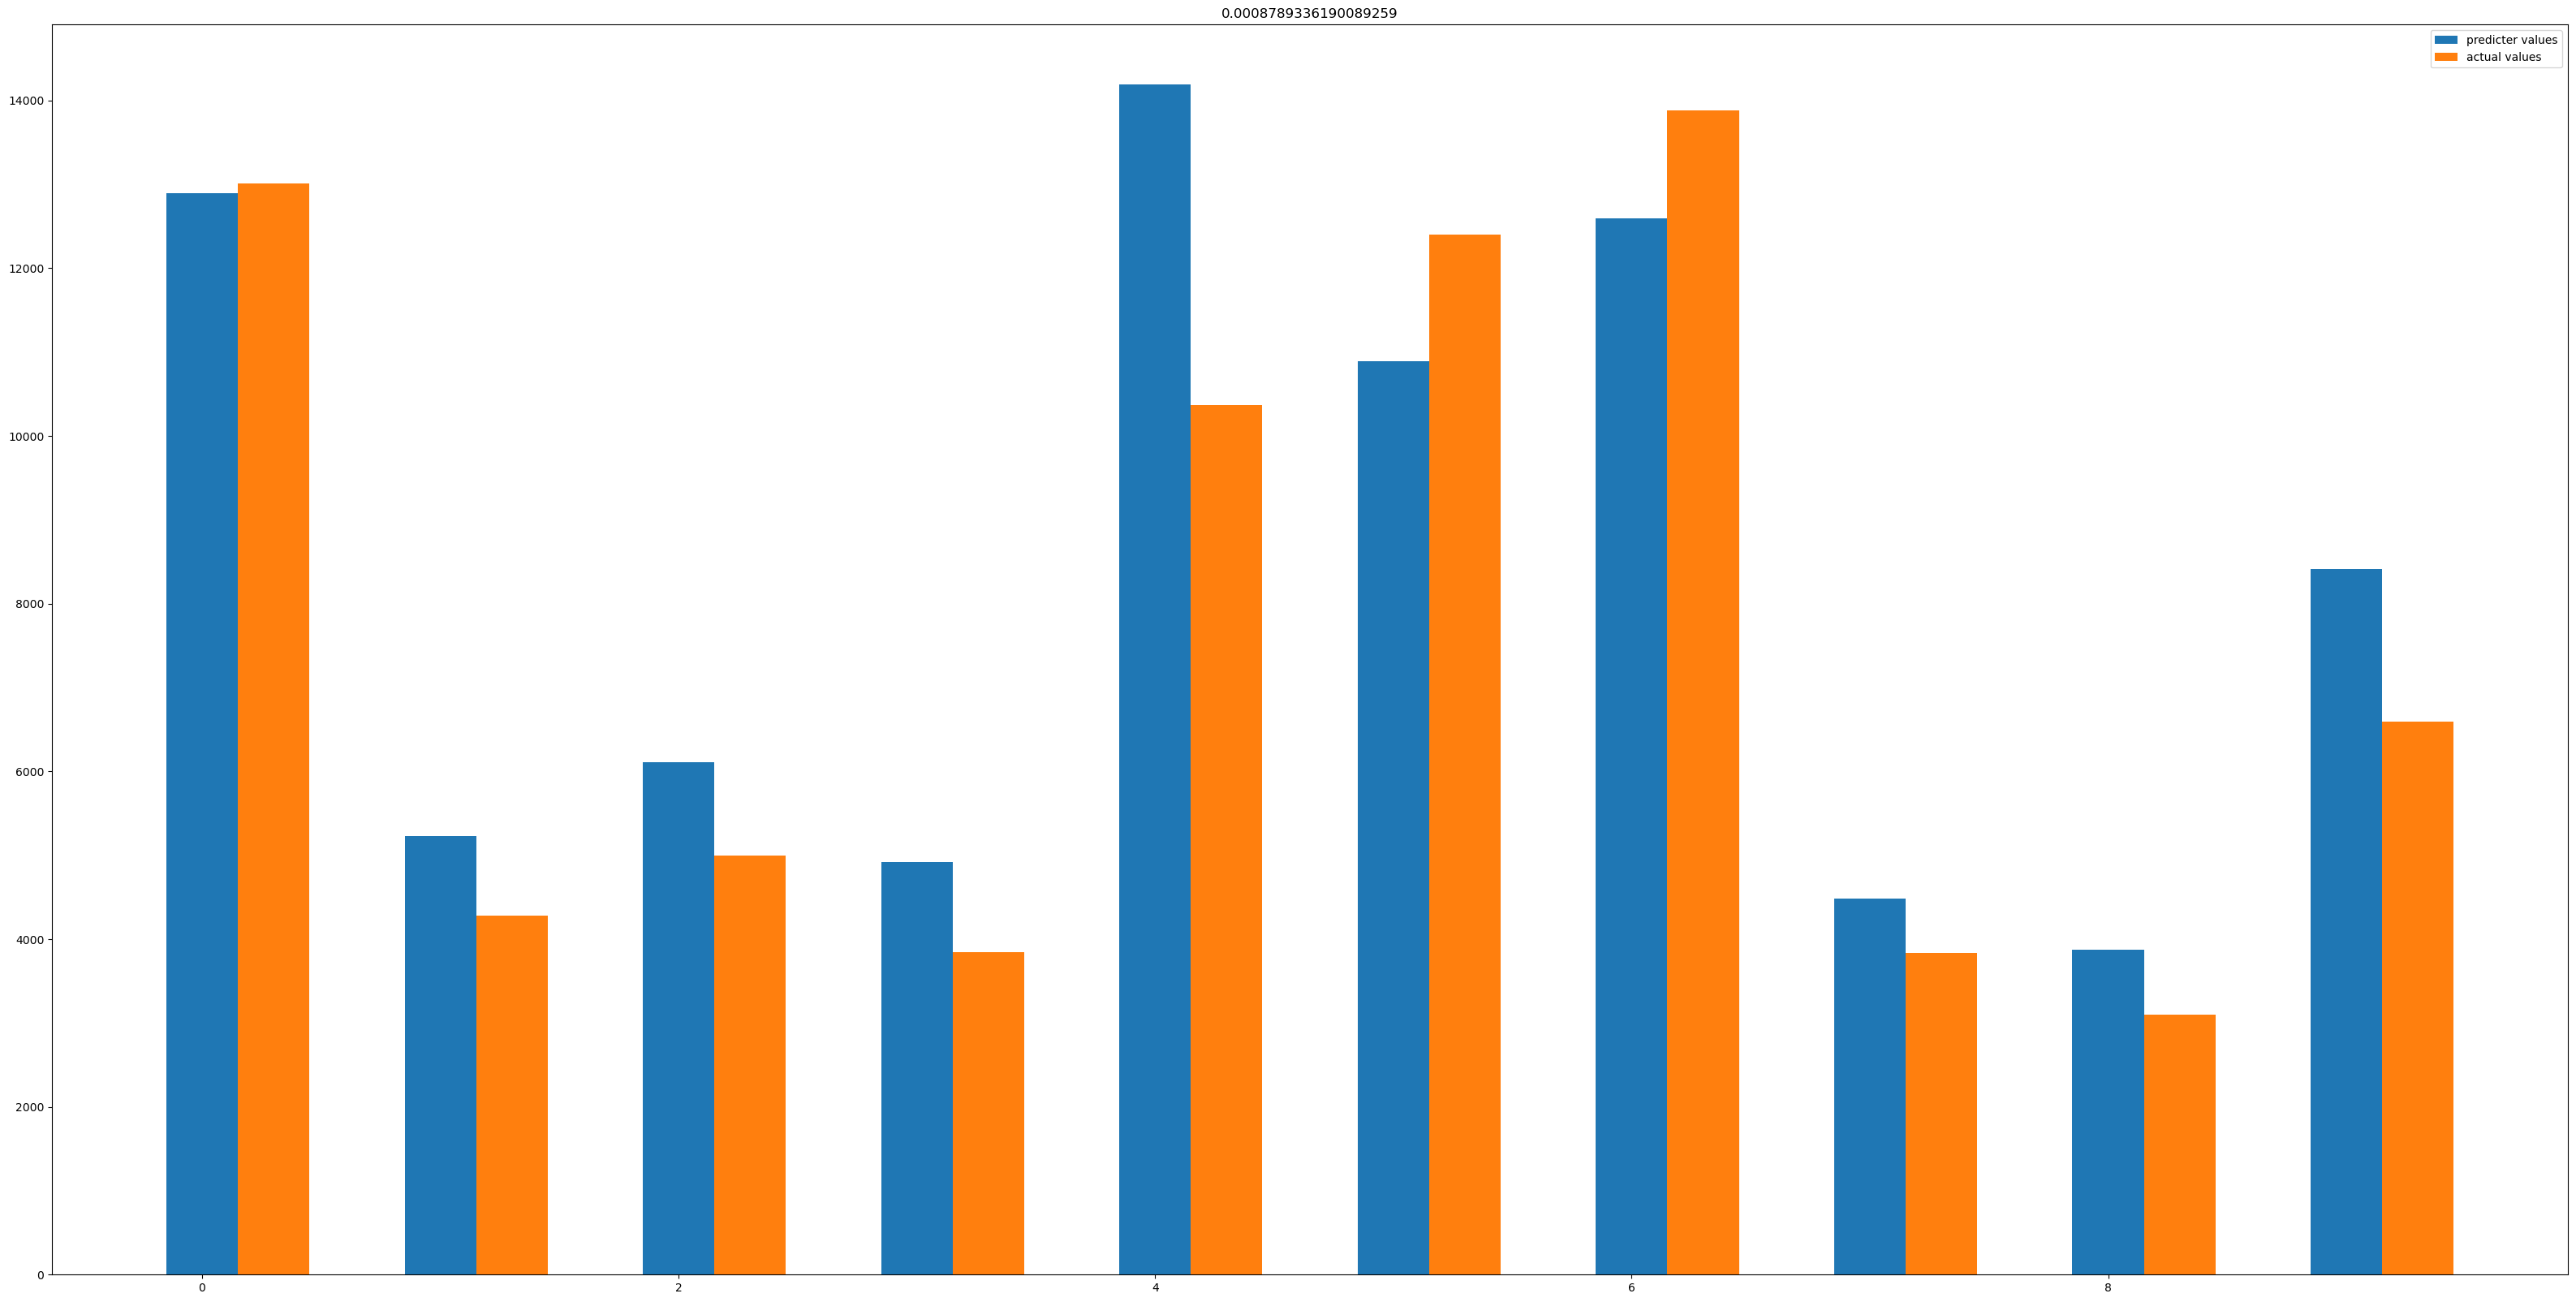

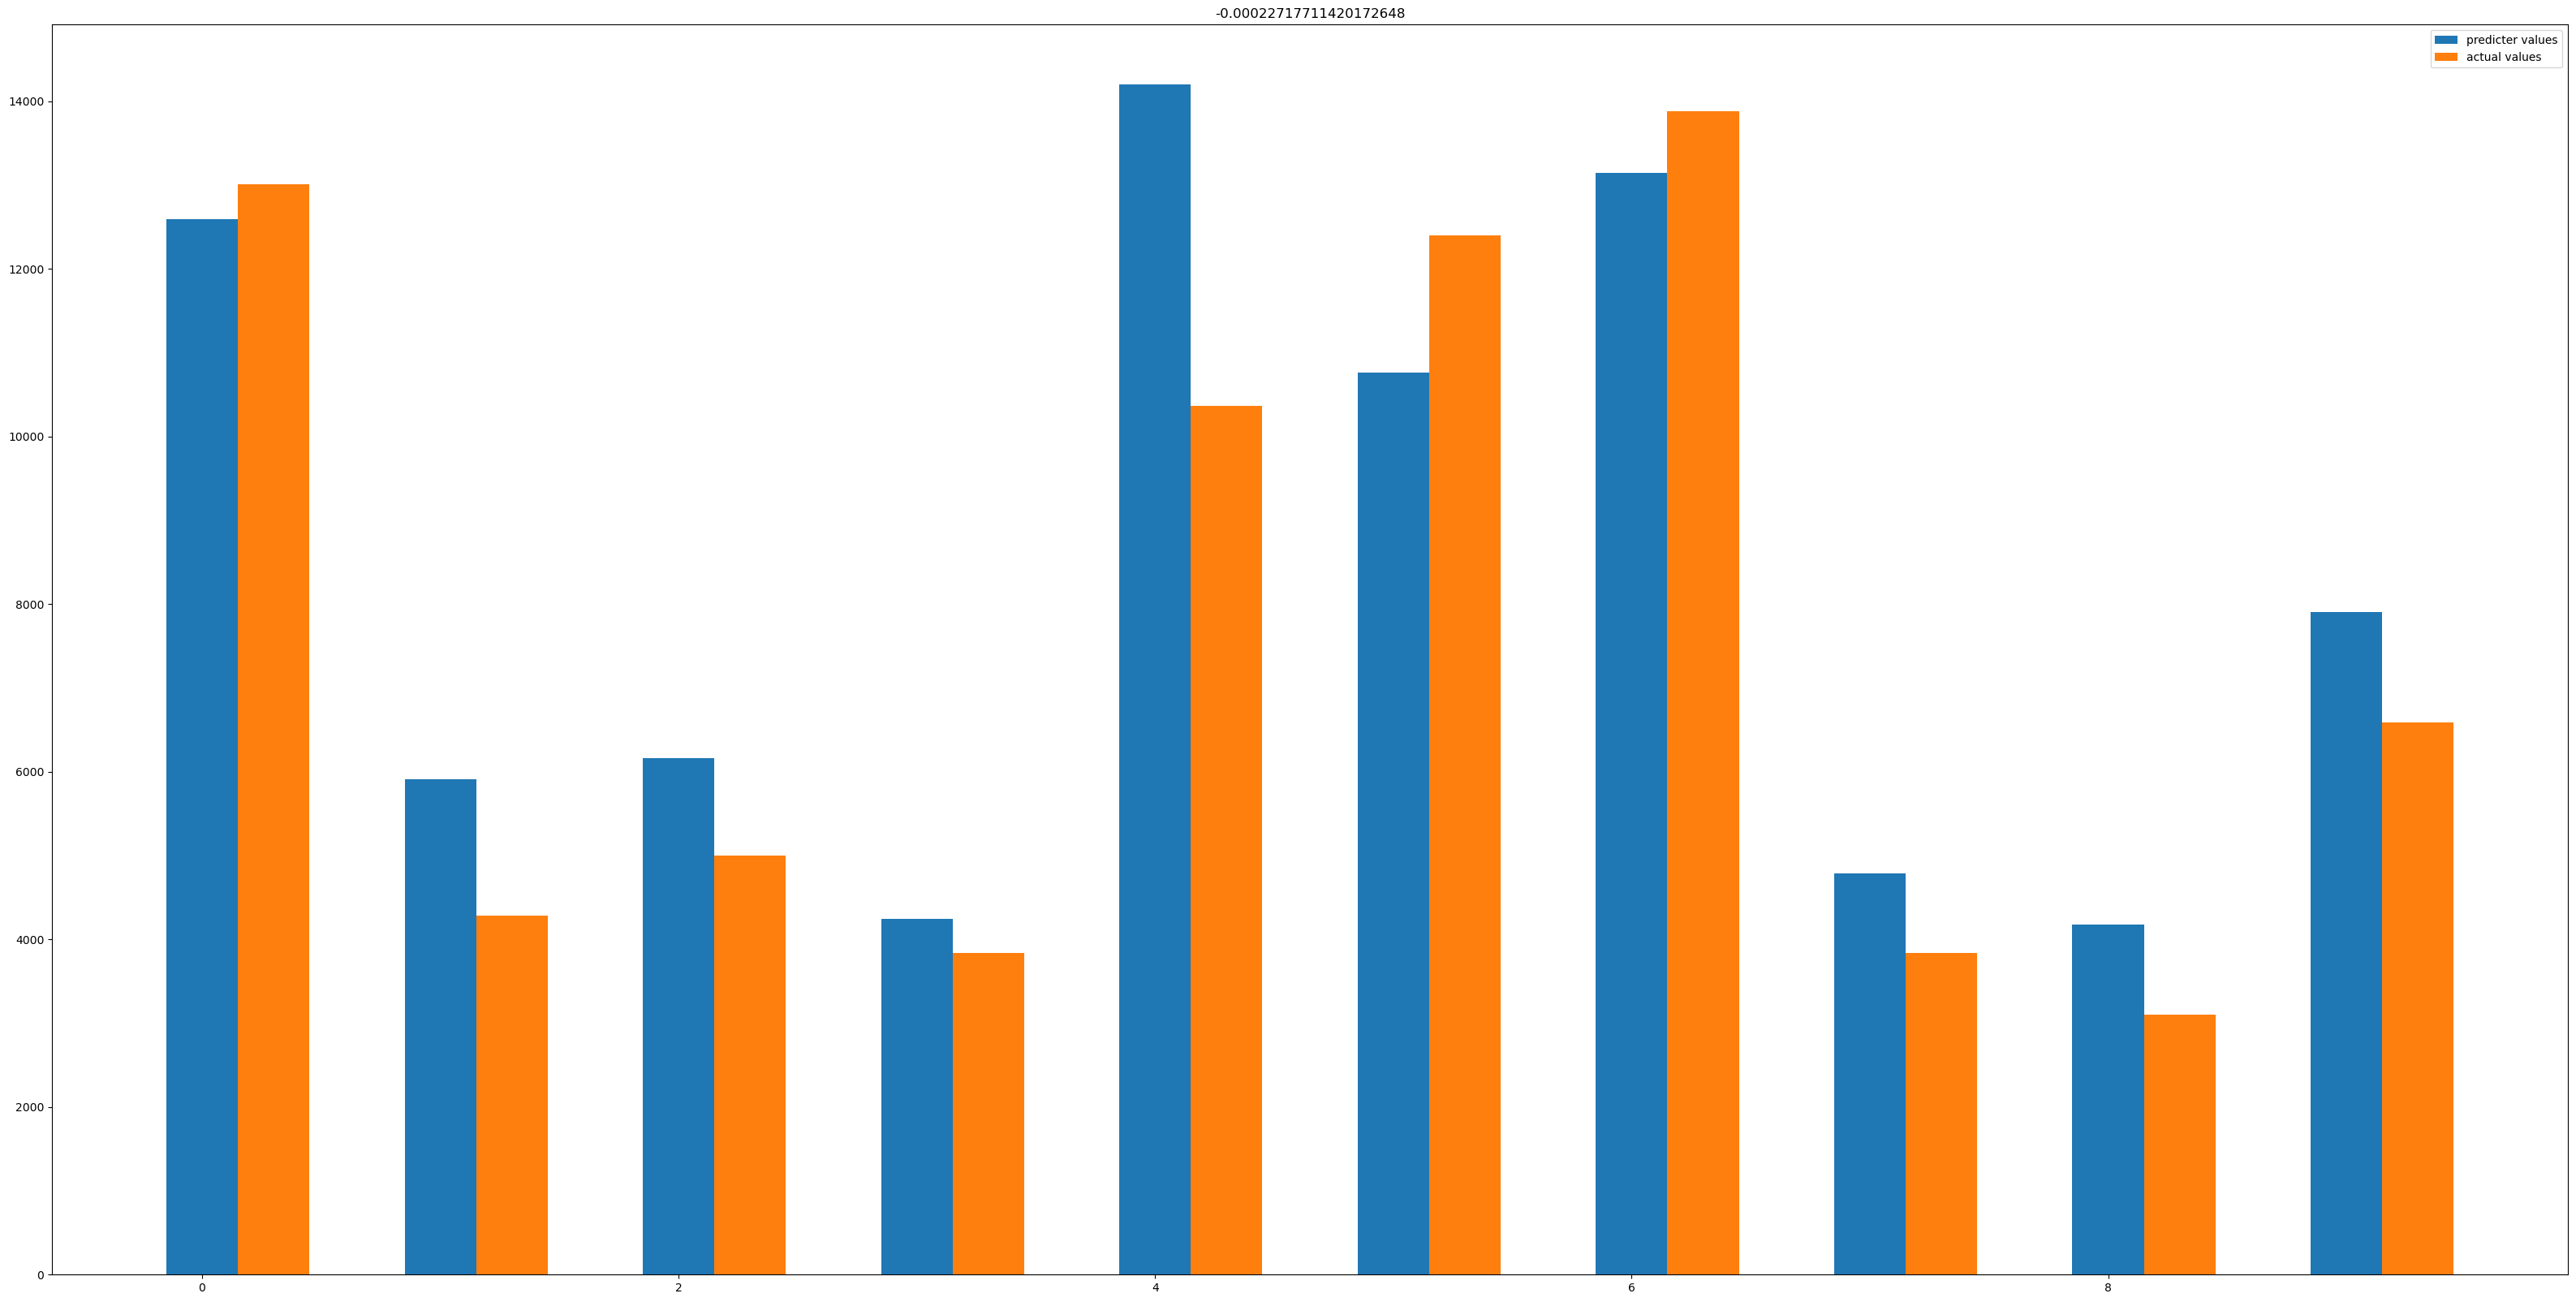

In [441]:
for i in range(1,5):
    polynomial(i)

In [449]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(6,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model3.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

In [450]:
model3.fit(X_train, y_train, epochs=500)

Epoch 1/500
224/224 [==============================] - 3s 5ms/step - loss: 3839.0374 - mae: 3839.0374
Epoch 2/500
224/224 [==============================] - 1s 5ms/step - loss: 2560.5432 - mae: 2560.5432
Epoch 3/500
224/224 [==============================] - 1s 5ms/step - loss: 2415.2046 - mae: 2415.2046
Epoch 4/500
224/224 [==============================] - 1s 5ms/step - loss: 2192.3181 - mae: 2192.3181
Epoch 5/500
224/224 [==============================] - 1s 6ms/step - loss: 2072.2356 - mae: 2072.2356
Epoch 6/500
224/224 [==============================] - 1s 5ms/step - loss: 2023.7786 - mae: 2023.7786
Epoch 7/500
224/224 [==============================] - 1s 5ms/step - loss: 1956.9373 - mae: 1956.9373
Epoch 8/500
224/224 [==============================] - 1s 5ms/step - loss: 1940.2391 - mae: 1940.2391
Epoch 9/500
224/224 [==============================] - 1s 5ms/step - loss: 1911.9012 - mae: 1911.9012
Epoch 10/500
224/224 [==============================] - 1s 5ms/step - loss: 1927.8

224/224 [==============================] - 1s 5ms/step - loss: 1807.1942 - mae: 1807.1942
Epoch 81/500
224/224 [==============================] - 1s 5ms/step - loss: 1802.0748 - mae: 1802.0748
Epoch 82/500
224/224 [==============================] - 1s 5ms/step - loss: 1796.7435 - mae: 1796.7435
Epoch 83/500
224/224 [==============================] - 1s 5ms/step - loss: 1793.7279 - mae: 1793.7279
Epoch 84/500
224/224 [==============================] - 1s 5ms/step - loss: 1799.4470 - mae: 1799.4470
Epoch 85/500
224/224 [==============================] - 1s 5ms/step - loss: 1797.2762 - mae: 1797.2762
Epoch 86/500
224/224 [==============================] - 1s 5ms/step - loss: 1808.5201 - mae: 1808.5201
Epoch 87/500
224/224 [==============================] - 1s 5ms/step - loss: 1798.9893 - mae: 1798.9893
Epoch 88/500
224/224 [==============================] - 1s 5ms/step - loss: 1797.8617 - mae: 1797.8617
Epoch 89/500
224/224 [==============================] - 1s 5ms/step - loss: 1796.8784 

224/224 [==============================] - 1s 5ms/step - loss: 1772.8032 - mae: 1772.8032
Epoch 160/500
224/224 [==============================] - 1s 5ms/step - loss: 1776.1434 - mae: 1776.1434
Epoch 161/500
224/224 [==============================] - 1s 5ms/step - loss: 1774.3462 - mae: 1774.3462
Epoch 162/500
224/224 [==============================] - 1s 5ms/step - loss: 1775.0367 - mae: 1775.0367
Epoch 163/500
224/224 [==============================] - 1s 5ms/step - loss: 1770.0813 - mae: 1770.0813
Epoch 164/500
224/224 [==============================] - 1s 5ms/step - loss: 1777.4053 - mae: 1777.4053
Epoch 165/500
224/224 [==============================] - 1s 5ms/step - loss: 1774.8936 - mae: 1774.8936
Epoch 166/500
224/224 [==============================] - 1s 5ms/step - loss: 1780.2941 - mae: 1780.2941
Epoch 167/500
224/224 [==============================] - 1s 5ms/step - loss: 1780.6475 - mae: 1780.6475
Epoch 168/500
224/224 [==============================] - 1s 5ms/step - loss: 1

224/224 [==============================] - 1s 5ms/step - loss: 1754.0801 - mae: 1754.0801
Epoch 238/500
224/224 [==============================] - 1s 5ms/step - loss: 1759.3662 - mae: 1759.3662
Epoch 239/500
224/224 [==============================] - 1s 5ms/step - loss: 1759.3015 - mae: 1759.3015
Epoch 240/500
224/224 [==============================] - 1s 5ms/step - loss: 1761.2080 - mae: 1761.2080
Epoch 241/500
224/224 [==============================] - 1s 5ms/step - loss: 1757.8558 - mae: 1757.8558
Epoch 242/500
224/224 [==============================] - 1s 5ms/step - loss: 1764.6921 - mae: 1764.6921
Epoch 243/500
224/224 [==============================] - 1s 5ms/step - loss: 1759.7162 - mae: 1759.7162
Epoch 244/500
224/224 [==============================] - 1s 5ms/step - loss: 1758.4034 - mae: 1758.4034
Epoch 245/500
224/224 [==============================] - 1s 5ms/step - loss: 1760.3323 - mae: 1760.3323
Epoch 246/500
224/224 [==============================] - 1s 5ms/step - loss: 1

224/224 [==============================] - 1s 5ms/step - loss: 1750.2059 - mae: 1750.2059
Epoch 316/500
224/224 [==============================] - 1s 5ms/step - loss: 1742.3131 - mae: 1742.3131
Epoch 317/500
224/224 [==============================] - 1s 5ms/step - loss: 1746.1635 - mae: 1746.1635
Epoch 318/500
224/224 [==============================] - 1s 5ms/step - loss: 1740.8971 - mae: 1740.8971
Epoch 319/500
224/224 [==============================] - 1s 5ms/step - loss: 1748.6787 - mae: 1748.6787
Epoch 320/500
224/224 [==============================] - 1s 6ms/step - loss: 1743.3314 - mae: 1743.3314
Epoch 321/500
224/224 [==============================] - 1s 6ms/step - loss: 1740.2925 - mae: 1740.2925
Epoch 322/500
224/224 [==============================] - 1s 6ms/step - loss: 1754.8651 - mae: 1754.8651
Epoch 323/500
224/224 [==============================] - 1s 6ms/step - loss: 1744.1335 - mae: 1744.1335
Epoch 324/500
224/224 [==============================] - 1s 5ms/step - loss: 1

224/224 [==============================] - 1s 5ms/step - loss: 1744.8744 - mae: 1744.8744
Epoch 394/500
224/224 [==============================] - 1s 5ms/step - loss: 1734.5559 - mae: 1734.5559
Epoch 395/500
224/224 [==============================] - 1s 5ms/step - loss: 1738.2533 - mae: 1738.2533
Epoch 396/500
224/224 [==============================] - 1s 6ms/step - loss: 1740.6952 - mae: 1740.6952
Epoch 397/500
224/224 [==============================] - 1s 6ms/step - loss: 1738.7463 - mae: 1738.7463
Epoch 398/500
224/224 [==============================] - 1s 6ms/step - loss: 1740.6251 - mae: 1740.6251
Epoch 399/500
224/224 [==============================] - 1s 5ms/step - loss: 1734.8098 - mae: 1734.8098
Epoch 400/500
224/224 [==============================] - 1s 5ms/step - loss: 1742.9603 - mae: 1742.9603
Epoch 401/500
224/224 [==============================] - 1s 5ms/step - loss: 1730.5378 - mae: 1730.5378
Epoch 402/500
224/224 [==============================] - 1s 5ms/step - loss: 1

224/224 [==============================] - 1s 6ms/step - loss: 1725.2157 - mae: 1725.2157
Epoch 472/500
224/224 [==============================] - 1s 6ms/step - loss: 1726.9436 - mae: 1726.9436
Epoch 473/500
224/224 [==============================] - 1s 6ms/step - loss: 1734.7272 - mae: 1734.7272
Epoch 474/500
224/224 [==============================] - 1s 6ms/step - loss: 1730.8132 - mae: 1730.8132
Epoch 475/500
224/224 [==============================] - 1s 5ms/step - loss: 1732.4783 - mae: 1732.4783
Epoch 476/500
224/224 [==============================] - 1s 5ms/step - loss: 1728.0266 - mae: 1728.0266
Epoch 477/500
224/224 [==============================] - 1s 5ms/step - loss: 1737.7427 - mae: 1737.7427
Epoch 478/500
224/224 [==============================] - 1s 5ms/step - loss: 1725.7107 - mae: 1725.7107
Epoch 479/500
224/224 [==============================] - 1s 5ms/step - loss: 1725.0747 - mae: 1725.0747
Epoch 480/500
224/224 [==============================] - 1s 6ms/step - loss: 1

In [444]:
y_pred3 = model3.predict(X_test)


111/111 [==============================] - 0s 2ms/step


In [445]:
r2_model3 =r2_score(y_pred3, y_test)

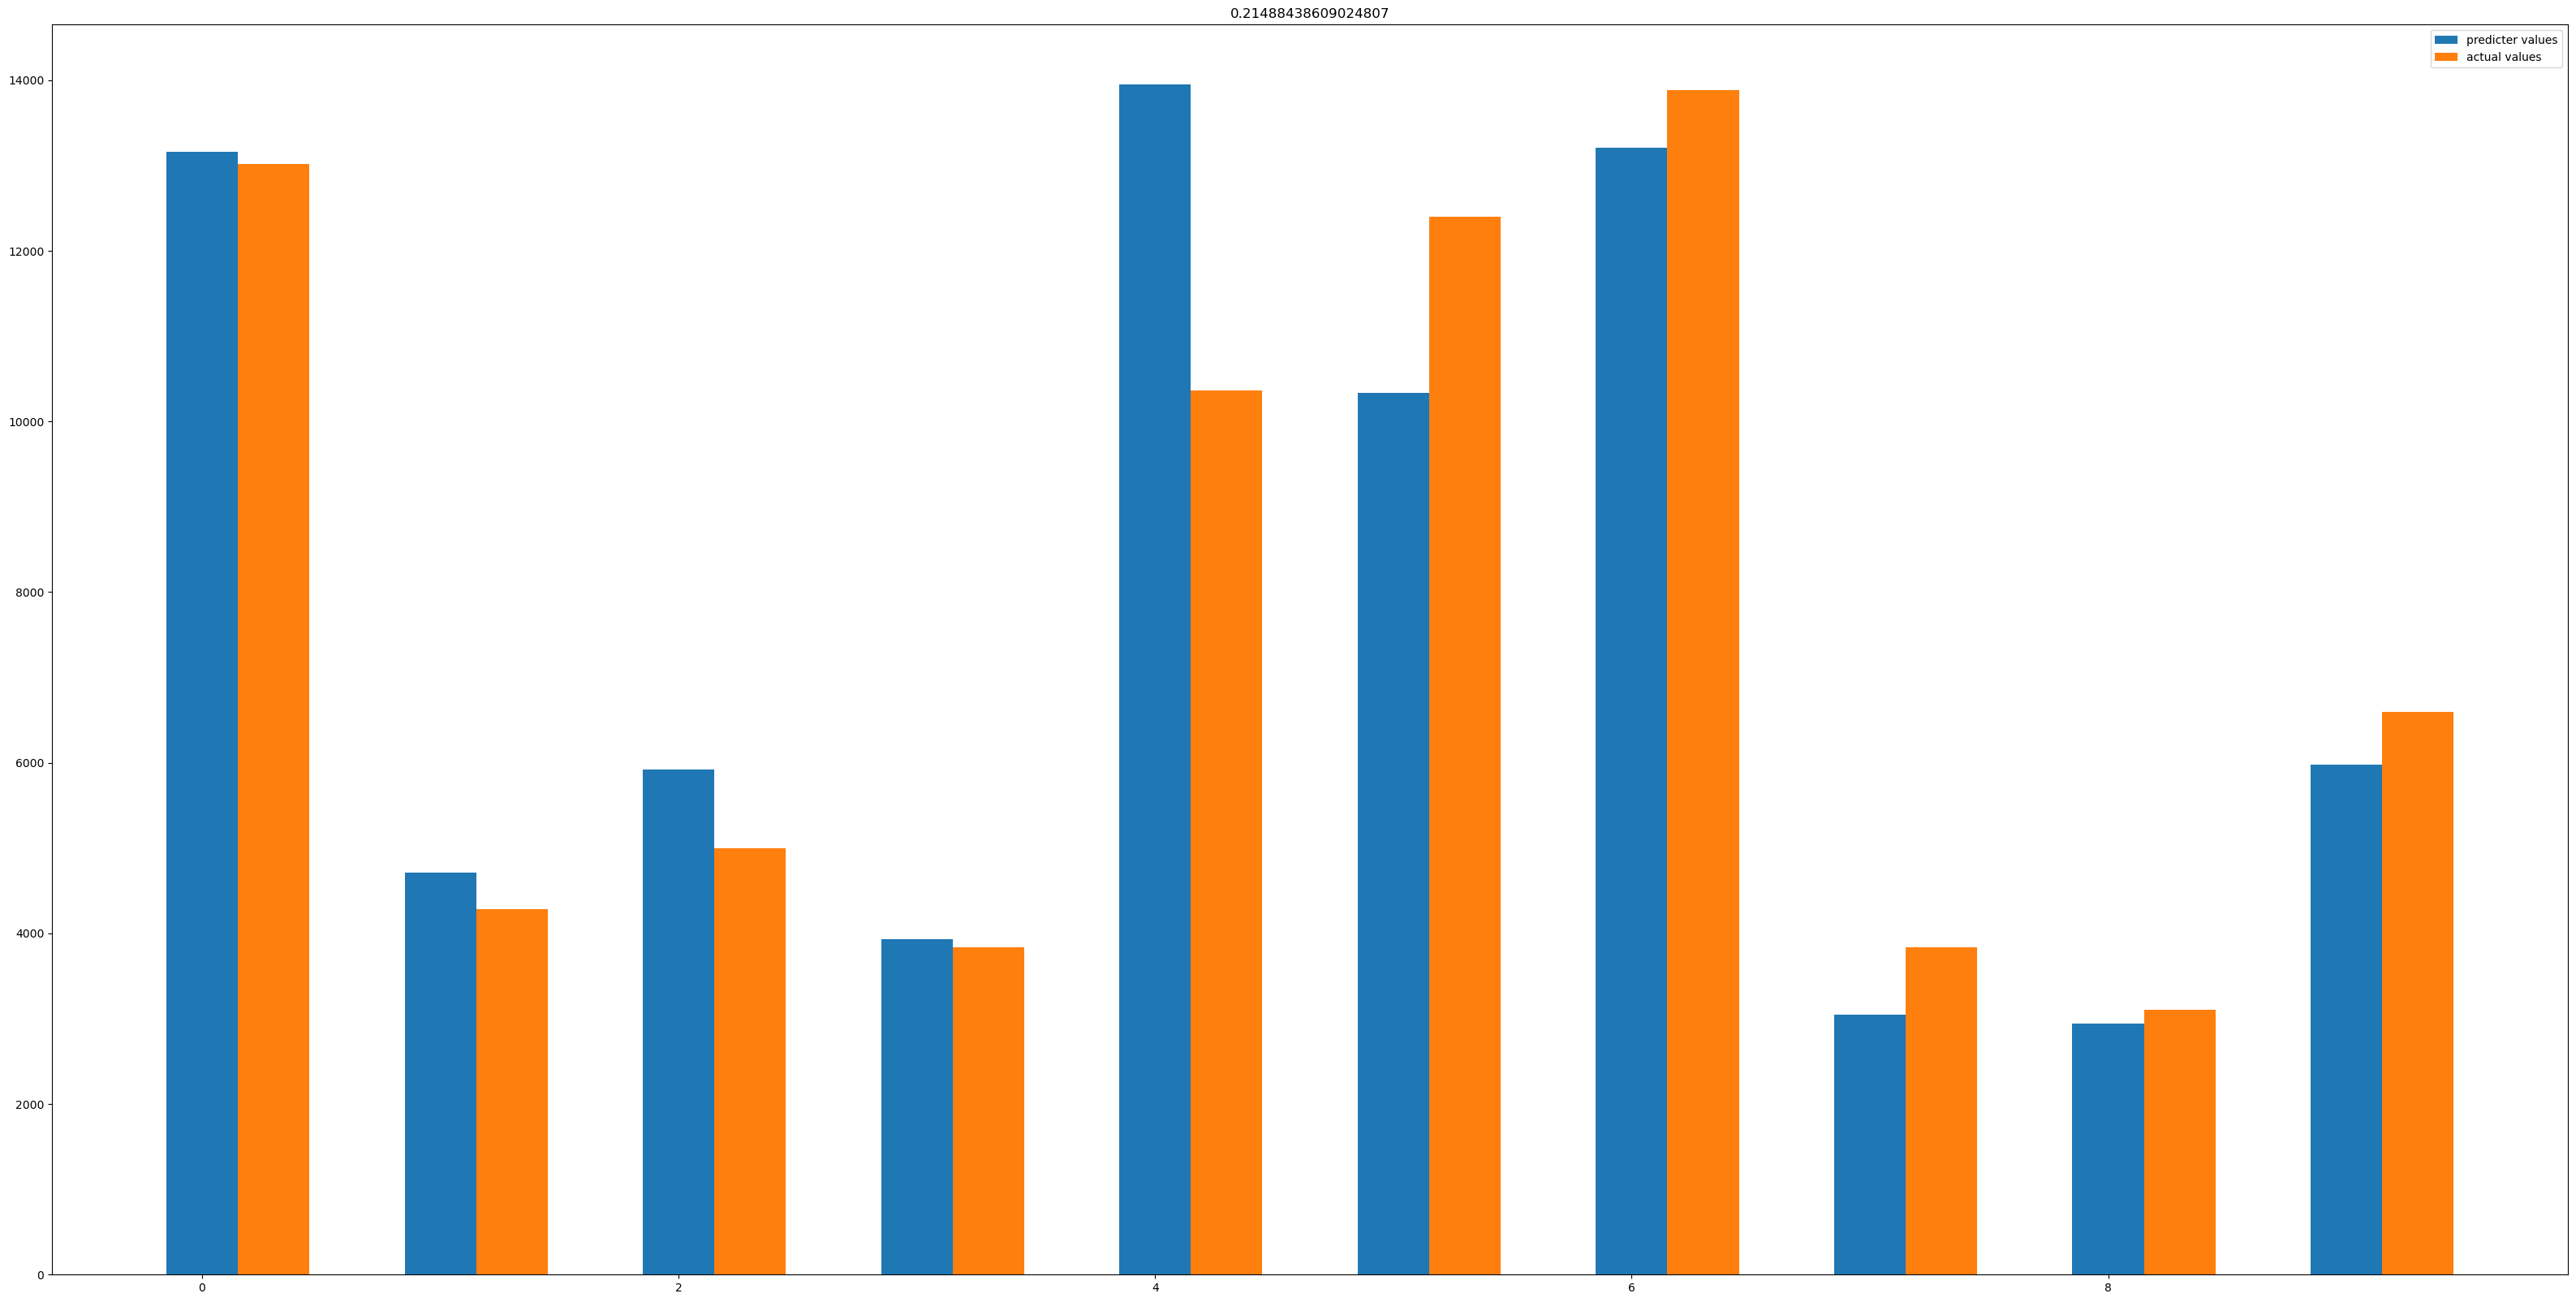

In [446]:
bar_ploting(y_test, y_pred3.reshape(3531,), 10, r2_model3)